<a href="https://colab.research.google.com/github/just-suraj-j/Product-Sales-Prediction/blob/main/Product_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Innovation Forecasting Model**
<br>

##**Banana Flavoured Oatmeal**

A FastMoving Consumer Goods (FMCG) company, let's call it XYZ, is looking for a solution to accurately
forecast demand for new product innovations. The company has a dataset of all their Innovation
products from the last 3 years, which includes Product, Time, UPC, Category, Sub Category, Dollar Sales,
Unit Sales, Avg Prc/Unit, NonPromoted Avg Prc/Unit, Promoted Avg Prc/Unit, Distribution Index, %
Stores, and Unit Velocity. The company wants you to build an Innovation Forecasting Model that can
accurately predict the sales for a new product for 52 Weeks, Banana Flavoured Oatmeal, which is going
to be launched next year at a price point of $3.49 and will be on promotion :

<br>Week 6 to Week 9 @ $2.49
<br>Week 12 to Week 16 @ Buy 1 get 1 Free.
<br>Remaining Weeks will be at the Regular price.

##Loading Dataset and checking for missing values

###Mounting Google Drive to connect to data source

In [ ]:
#Mount files to Google drive where input file is stored
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import necessary Libraries

In [ ]:
#importing libraries
import os # To use file path
import pandas as pd # To use dataframes
import numpy as np  # To use np.arrays

# To add holiday value to dataset
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# To plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import autocorrelation_plot as auto_corr

#For date-time
import math
from datetime import datetime
from datetime import timedelta

#For data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.preprocessing import RobustScaler
!pip install category_encoders
from category_encoders import BinaryEncoder

#To split data for training and validation
from sklearn.model_selection import train_test_split

# To build model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose as season

#Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

#Time Series Model
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Unzipping input file (Only Once)

In [ ]:
#!unzip "/content/drive/MyDrive/Pepsico/Case Study- Innovation Forecasting.zip" -d "/content/drive/MyDrive/Pepsico"


###Loading data in Pandas DataFrame

In [ ]:
os.chdir('/content/drive/MyDrive/Pepsico')

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Pepsico/Data Set.xlsx')

###Understanding Data

In [ ]:
#Validating loaded data
df.head()

,Product,Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
0,Product #1,"52 Weeks Ending Dec 30, 2018",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Product #1,"52 Weeks Ending Dec 29, 2019",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Product #1,"52 Weeks Ending Dec 27, 2020",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Product #1,"52 Weeks Ending Dec 26, 2021",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Product #1,"52 Weeks Ending Dec 25, 2022",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Checking information on columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123300 entries, 0 to 123299
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Product                    123300 non-null  object 
 1   Time                       123300 non-null  object 
 2   UPC                        123300 non-null  int64  
 3   Category                   123300 non-null  object 
 4   Sub Category               123300 non-null  object 
 5   Dollar Sales               21453 non-null   float64
 6   Unit Sales                 21453 non-null   float64
 7   Avg Prc/Unit               21453 non-null   float64
 8   Non Promoted-Avg Prc/Unit  19666 non-null   float64
 9   Promoted Avg Prc/Unit      14958 non-null   float64
 10  Distribution Index         21453 non-null   float64
 11  % Stores                   21453 non-null   float64
 12  Unit Velocity              21453 non-null   float64
dtypes: float64(8), int64(1), obje

In [ ]:
#size of dataset
df.shape

(123300, 13)

In [ ]:
#Missing Data
df.isnull().sum()

Product                           0
Time                              0
UPC                               0
Category                          0
Sub Category                      0
Dollar Sales                 101847
Unit Sales                   101847
Avg Prc/Unit                 101847
Non Promoted-Avg Prc/Unit    103634
Promoted Avg Prc/Unit        108342
Distribution Index           101847
% Stores                     101847
Unit Velocity                101847
dtype: int64

In [ ]:
#Percentage of missing data
null_volumetric = df.isnull().sum().reset_index()
null_volumetric.columns = ['Column', 'Missing value']
null_volumetric['%Missing value'] = ((null_volumetric['Missing value']*100)/df.shape[0]).round(2)
null_volumetric

,Column,Missing value,%Missing value
0,Product,0,0.00
1,Time,0,0.00
2,UPC,0,0.00
3,Category,0,0.00
4,Sub Category,0,0.00
5,Dollar Sales,101847,82.60
6,Unit Sales,101847,82.60
7,Avg Prc/Unit,101847,82.60
8,Non Promoted-Avg Prc/Unit,103634,84.05
9,Promoted Avg Prc/Unit,108342,87.87


In [ ]:
# Creating column's subsets as per the datatype
dataset_dtypes = df.dtypes.reset_index()
dataset_dtypes.columns = ['variable', 'dtype']
# Getting the categorical columns
cat_cols = dataset_dtypes[dataset_dtypes['dtype']=='object']['variable'].tolist()
# Getting the continuos columns
cont_cols = dataset_dtypes[dataset_dtypes['dtype']!='object']['variable'].tolist()

print("Categorical Columns:", cat_cols)
print()
print("Continuos Columns:", cont_cols)

Categorical Columns: ['Product', 'Time', 'Category', 'Sub Category']

Continuos Columns: ['UPC', 'Dollar Sales', 'Unit Sales', 'Avg Prc/Unit', 'Non Promoted-Avg Prc/Unit', 'Promoted Avg Prc/Unit', 'Distribution Index', '% Stores', 'Unit Velocity']


In [ ]:
df[cat_cols].describe().T

,count,unique,top,freq
Product,123300,450,Product #1,274
Time,123300,274,"52 Weeks Ending Dec 30, 2018",450
Category,123300,1,GRITS-HOT CEREAL,123300
Sub Category,123300,1,HOT CEREAL,123300


In [ ]:
df[cont_cols].describe(percentiles=[.05,.25,.50,.75,.95]).round(2).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
UPC,123300.0,2.557044e+12,3.713441e+12,9897468.00,6.000004e+10,6.000112e+10,6.000114e+10,5.441990e+12,5.442202e+12,1.771441e+13
Dollar Sales,21453.0,1.194419e+05,8.039270e+05,0.01,3.990000e+00,3.402000e+02,2.417166e+04,7.903790e+04,3.328910e+05,3.388278e+07
Unit Sales,21453.0,4.015419e+04,2.352936e+05,1.00,1.000000e+00,1.410000e+02,1.027600e+04,2.940700e+04,9.438106e+04,7.551745e+06
Avg Prc/Unit,21453.0,2.940000e+00,1.680000e+00,0.01,9.800000e-01,2.000000e+00,2.570000e+00,3.610000e+00,5.060000e+00,1.824000e+01
Non Promoted-Avg Prc/Unit,19666.0,2.960000e+00,1.680000e+00,0.01,9.800000e-01,2.030000e+00,2.580000e+00,3.560000e+00,5.060000e+00,1.824000e+01
Promoted Avg Prc/Unit,14958.0,2.690000e+00,1.430000e+00,0.10,8.500000e-01,1.750000e+00,2.420000e+00,3.380000e+00,4.940000e+00,1.378000e+01
Distribution Index,21453.0,4.874000e+01,4.014000e+01,0.00,3.000000e-02,1.120000e+00,5.280000e+01,8.975000e+01,9.844000e+01,9.991000e+01
% Stores,21453.0,4.676000e+01,3.925000e+01,0.02,2.000000e-02,9.600000e-01,4.885000e+01,8.640000e+01,9.767000e+01,1.000000e+02
Unit Velocity,21453.0,6.640000e+00,9.380000e+00,0.50,1.000000e+00,2.880000e+00,4.980000e+00,8.180000e+00,1.824000e+01,1.080000e+03


##Data Cleaning

In [ ]:
#Deleting Coulumns that do not add information
df=df.drop(columns=['Category', 'Sub Category', 'UPC'])

In [ ]:
#Deleting Products Data which have no information
df=df.dropna(how='all',subset=['Dollar Sales','Unit Sales','Avg Prc/Unit','Non Promoted-Avg Prc/Unit','Promoted Avg Prc/Unit','Distribution Index','% Stores','Unit Velocity'])

In [ ]:
#Remove duplicates
df.drop_duplicates()

,Product,Time,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
278,Product #2,"52 Weeks Ending Dec 25, 2022",120.95,78.0,1.550641,1.641045,1.0,0.052020,0.152505,2.868056
489,Product #2,"1 Week Ending Jan 09, 2022",3.78,2.0,1.890000,1.890000,NaN,0.027212,0.021796,2.000000
490,Product #2,"1 Week Ending Jan 16, 2022",13.23,7.0,1.890000,1.890000,NaN,0.087065,0.065388,2.333333
491,Product #2,"1 Week Ending Jan 23, 2022",4.78,3.0,1.593333,1.890000,1.0,0.043179,0.043592,1.500000
492,Product #2,"1 Week Ending Jan 30, 2022",19.23,13.0,1.479231,1.890000,1.0,0.100525,0.087184,3.250000
...,...,...,...,...,...,...,...,...,...,...
120952,Product #442,"1 Week Ending Mar 01, 2020",15.00,1.0,15.000000,15.000000,NaN,0.037132,0.021749,1.000000
121008,Product #442,"1 Week Ending Mar 28, 2021",15.00,1.0,15.000000,15.000000,NaN,0.009976,0.021782,1.000000
122480,Product #448,"52 Weeks Ending Dec 27, 2020",18.80,2.0,9.400000,NaN,NaN,0.024298,0.043488,1.000000
122588,Product #448,"1 Week Ending Jan 05, 2020",16.80,1.0,16.800000,16.800000,NaN,0.022836,0.021758,1.000000


In [ ]:
#Removing rows with sub totals and grand totals
df=df[df["Time"].str.contains("52")==False]

In [ ]:
#Retain only Product number
df['Product']=df['Product'].str.replace('Product','')
df['Product']=df['Product'].str.replace('#','')

In [ ]:
df.head()

,Product,Time,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
489,2,"1 Week Ending Jan 09, 2022",3.78,2.0,1.890000,1.89,NaN,0.027212,0.021796,2.000000
490,2,"1 Week Ending Jan 16, 2022",13.23,7.0,1.890000,1.89,NaN,0.087065,0.065388,2.333333
491,2,"1 Week Ending Jan 23, 2022",4.78,3.0,1.593333,1.89,1.0,0.043179,0.043592,1.500000
492,2,"1 Week Ending Jan 30, 2022",19.23,13.0,1.479231,1.89,1.0,0.100525,0.087184,3.250000
493,2,"1 Week Ending Feb 06, 2022",9.67,7.0,1.381429,1.89,1.0,0.072208,0.065388,2.333333


In [ ]:
# Creating column's subsets as per the datatype
dataset_dtypes = df.dtypes.reset_index()
dataset_dtypes.columns = ['variable', 'dtype']
# Getting the categorical columns
cat_cols = dataset_dtypes[dataset_dtypes['dtype']=='object']['variable'].tolist()
# Getting the continuos columns
cont_cols = dataset_dtypes[dataset_dtypes['dtype']!='object']['variable'].tolist()

print("Categorical Columns:", cat_cols)
print()
print("Continuos Columns:", cont_cols)

Categorical Columns: ['Product', 'Time']

Continuos Columns: ['Dollar Sales', 'Unit Sales', 'Avg Prc/Unit', 'Non Promoted-Avg Prc/Unit', 'Promoted Avg Prc/Unit', 'Distribution Index', '% Stores', 'Unit Velocity']


In [ ]:
df[cat_cols].describe().T

,count,unique,top,freq
Product,20716,198,414,268
Time,20716,268,"1 Week Ending Sep 15, 2019",94


In [ ]:
df[cont_cols].describe(percentiles=[.05,.25,.50,.75,.95]).round(2).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Dollar Sales,20716.0,60832.56,101944.33,0.01,4.00,395.18,24075.49,76406.04,264265.15,1141825.25
Unit Sales,20716.0,20546.29,28157.71,1.00,1.00,170.02,10253.50,28443.19,79793.24,315262.00
Avg Prc/Unit,20716.0,2.92,1.61,0.01,0.98,2.00,2.57,3.55,5.05,18.24
Non Promoted-Avg Prc/Unit,19081.0,2.94,1.62,0.01,0.98,2.04,2.58,3.47,5.06,18.24
Promoted Avg Prc/Unit,14553.0,2.69,1.42,0.10,0.84,1.75,2.42,3.38,4.92,11.61
Distribution Index,20716.0,49.35,40.05,0.00,0.03,1.29,53.65,90.03,98.46,99.91
% Stores,20716.0,47.07,39.12,0.02,0.02,1.07,49.69,86.39,97.57,99.85
Unit Velocity,20716.0,6.69,9.48,0.50,1.00,2.97,5.00,8.24,18.41,1080.00


##Handling Missing Data

In [ ]:
#Percentage of missing data
null_volumetric = df.isnull().sum().reset_index()
null_volumetric.columns = ['Column', 'Missing value']
null_volumetric['%Missing value'] = ((null_volumetric['Missing value']*100)/df.shape[0]).round(2)
null_volumetric

,Column,Missing value,%Missing value
0,Product,0,0.00
1,Time,0,0.00
2,Dollar Sales,0,0.00
3,Unit Sales,0,0.00
4,Avg Prc/Unit,0,0.00
5,Non Promoted-Avg Prc/Unit,1635,7.89
6,Promoted Avg Prc/Unit,6163,29.75
7,Distribution Index,0,0.00
8,% Stores,0,0.00
9,Unit Velocity,0,0.00


In [ ]:
#Considering Avg Prc/Unit when Promoted Prc/Unit or Non Promoted Avg Prc/Unit is missing
df['Non Promoted-Avg Prc/Unit'] = df['Non Promoted-Avg Prc/Unit'].fillna(df['Avg Prc/Unit'])
df['Promoted Avg Prc/Unit'] = df['Promoted Avg Prc/Unit'].fillna(df['Avg Prc/Unit'])

In [ ]:
df.isnull().sum()

Product                      0
Time                         0
Dollar Sales                 0
Unit Sales                   0
Avg Prc/Unit                 0
Non Promoted-Avg Prc/Unit    0
Promoted Avg Prc/Unit        0
Distribution Index           0
% Stores                     0
Unit Velocity                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20716 entries, 489 to 122596
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product                    20716 non-null  object 
 1   Time                       20716 non-null  object 
 2   Dollar Sales               20716 non-null  float64
 3   Unit Sales                 20716 non-null  float64
 4   Avg Prc/Unit               20716 non-null  float64
 5   Non Promoted-Avg Prc/Unit  20716 non-null  float64
 6   Promoted Avg Prc/Unit      20716 non-null  float64
 7   Distribution Index         20716 non-null  float64
 8   % Stores                   20716 non-null  float64
 9   Unit Velocity              20716 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.7+ MB


##Handling Outlier Values

<Axes: xlabel='Unit Velocity', ylabel='Dollar Sales'>

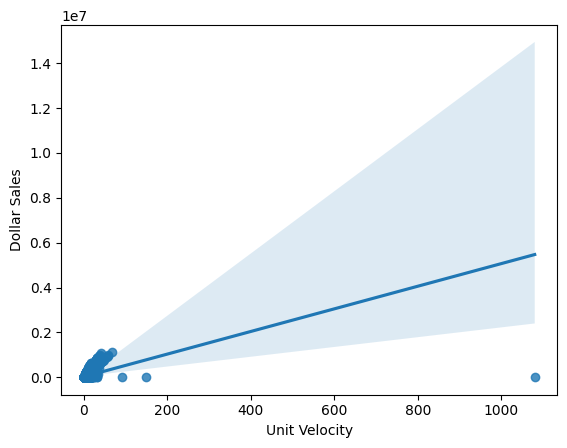

In [ ]:
#Dollar Sales vs Unit velocity with outliers
sns.regplot(y=df['Dollar Sales'], x=df['Unit Velocity'], scatter=True)

<Axes: >

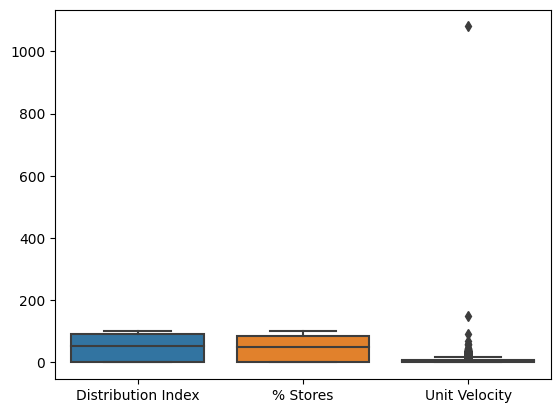

In [ ]:
#Statistical Summary with outliers
sns.boxplot(df[['Distribution Index','% Stores','Unit Velocity']])

In [ ]:
#Selecting suitable range for Unit Velocity
df=df[df['Unit Velocity']<120]
df=df[df['Dollar Sales']<1000000]

<Axes: xlabel='Unit Velocity', ylabel='Dollar Sales'>

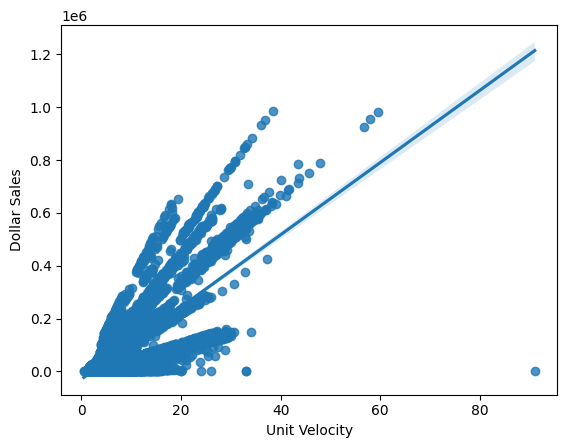

In [ ]:
#Dollar Sales vs Unit velocity after removal of outliers
sns.regplot(y=df['Dollar Sales'], x=df['Unit Velocity'], scatter=True)

<Axes: >

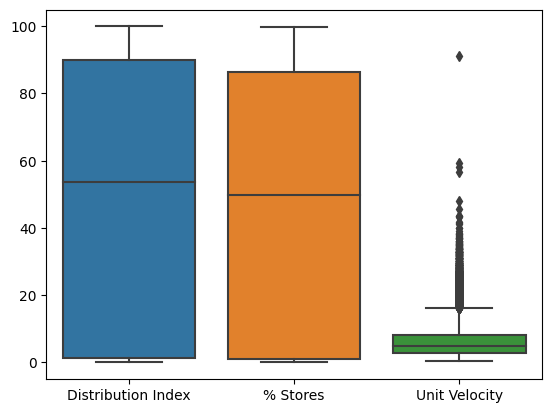

In [ ]:
##Statistical Summary with outliers after removal of outliers
sns.boxplot(df[['Distribution Index','% Stores','Unit Velocity']])

##Adding Holiday and Season information in data

###Adding Holiday information

In [ ]:
#Formatting Time column to find Month, Day and Year
df['Time']=df['Time'].apply(lambda x: x.strip())
df['Time']=df['Time'].apply(lambda x: x.split(" "))

df['Month']=df['Time'].apply(lambda x: x.pop(3))
df['Day']=df['Time'].apply(lambda x: x.pop(3))
df['Year']=df['Time'].apply(lambda x: x.pop(3))


In [ ]:
#Removing Comma in Day information
df['Day']=df['Day'].str.replace(',','')
print(df[['Month','Day','Year']])

       Month Day  Year
489      Jan  09  2022
490      Jan  16  2022
491      Jan  23  2022
492      Jan  30  2022
493      Feb  06  2022
...      ...  ..   ...
119737   Feb  19  2023
120952   Mar  01  2020
121008   Mar  28  2021
122588   Jan  05  2020
122596   Mar  01  2020

[20712 rows x 3 columns]


In [ ]:
#Replacing Month names with Month number
df['Month']=df['Month'].str.replace('Jan','1')
df['Month']=df['Month'].str.replace('Feb','2')
df['Month']=df['Month'].str.replace('Mar','3')
df['Month']=df['Month'].str.replace('Apr','4')
df['Month']=df['Month'].str.replace('May','5')
df['Month']=df['Month'].str.replace('Jun','6')
df['Month']=df['Month'].str.replace('Jul','7')
df['Month']=df['Month'].str.replace('Aug','8')
df['Month']=df['Month'].str.replace('Sep','9')
df['Month']=df['Month'].str.replace('Oct','10')
df['Month']=df['Month'].str.replace('Nov','11')
df['Month']=df['Month'].str.replace('Dec','12')

In [ ]:
#Adding date column based on above extracted Month, Year and Day
df['edate'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day))

#Adding date column 7 days prior to added date column
df['sdate'] = df['edate'] - pd.Timedelta(days=7)

#Adding Week number based on start of week
df['Week']=df['sdate'].dt.isocalendar().week

In [ ]:
#Adding US Fedral Holidays as True or False
holidays = calendar().holidays(start = df['sdate'].min(), end = df['edate'].max())
l=[any(x<=z and y>=z for z in holidays.tolist()) for x , y in zip(df['sdate'],df['edate'])]
[False, True, False, False]
df['Holiday']=l

In [ ]:
#converting Holiday to Object datatype
df['Holiday']=df['Holiday'].astype('object')
df['Week']=df['Week'].astype('object')

In [ ]:
df.head()

,Product,Time,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Month,Day,Year,edate,sdate,Week,Holiday
489,2,"[1, Week, Ending]",3.78,2.0,1.890000,1.89,1.89,0.027212,0.021796,2.000000,1,09,2022,2022-01-09,2022-01-02,52,False
490,2,"[1, Week, Ending]",13.23,7.0,1.890000,1.89,1.89,0.087065,0.065388,2.333333,1,16,2022,2022-01-16,2022-01-09,1,False
491,2,"[1, Week, Ending]",4.78,3.0,1.593333,1.89,1.00,0.043179,0.043592,1.500000,1,23,2022,2022-01-23,2022-01-16,2,True
492,2,"[1, Week, Ending]",19.23,13.0,1.479231,1.89,1.00,0.100525,0.087184,3.250000,1,30,2022,2022-01-30,2022-01-23,3,False
493,2,"[1, Week, Ending]",9.67,7.0,1.381429,1.89,1.00,0.072208,0.065388,2.333333,2,06,2022,2022-02-06,2022-01-30,4,False


###Adding Season information

In [ ]:
#Adding Season information
def get_season(i):
  if(i==12 or i==1 or i==2):
    return "Winter"
  elif(i==3 or i==4 or i==5):
    return "Spring"
  elif(i==6 or i==7 or i==8):
    return "Summer"
  else:
    return "Fall"



In [ ]:
#Applying Season to all rows
df['Season']=df['Month'].apply(lambda x: get_season(int(x)))

In [ ]:
#Number of Seasons
df['Season'].nunique()

4

In [ ]:
#Remove Time column from data
df=df.drop(columns=['Time'])

In [ ]:
df.head()

,Product,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Month,Day,Year,edate,sdate,Week,Holiday,Season
489,2,3.78,2.0,1.890000,1.89,1.89,0.027212,0.021796,2.000000,1,09,2022,2022-01-09,2022-01-02,52,False,Winter
490,2,13.23,7.0,1.890000,1.89,1.89,0.087065,0.065388,2.333333,1,16,2022,2022-01-16,2022-01-09,1,False,Winter
491,2,4.78,3.0,1.593333,1.89,1.00,0.043179,0.043592,1.500000,1,23,2022,2022-01-23,2022-01-16,2,True,Winter
492,2,19.23,13.0,1.479231,1.89,1.00,0.100525,0.087184,3.250000,1,30,2022,2022-01-30,2022-01-23,3,False,Winter
493,2,9.67,7.0,1.381429,1.89,1.00,0.072208,0.065388,2.333333,2,06,2022,2022-02-06,2022-01-30,4,False,Winter


##Data Exploration

In [ ]:
#Top 5 Products by Dollar Sales
df_top_product = df.groupby(by=['Product'], as_index=False)['Dollar Sales'].sum()
df_top_product.sort_values('Dollar Sales', ascending=False)[:5]

,Product,Dollar Sales
143,382,1.371574e+08
164,426,1.187526e+08
40,176,9.187535e+07
27,153,6.960450e+07
51,196,5.627026e+07


<Axes: xlabel='Week'>

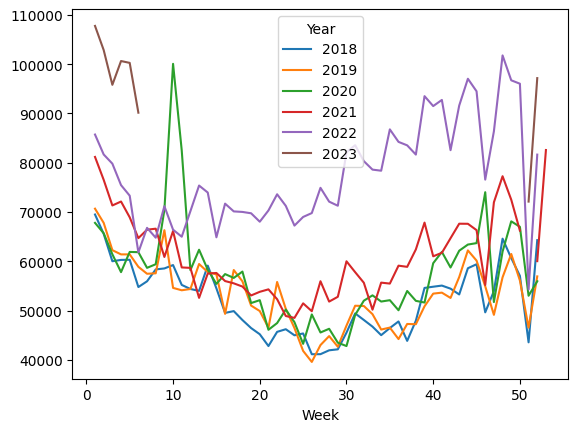

In [ ]:
#Sales by Year
weekly_sales = pd.pivot_table(df, values = "Dollar Sales", columns = "Year", index = "Week")
weekly_sales.plot()

<Axes: xlabel='Unit Velocity'>

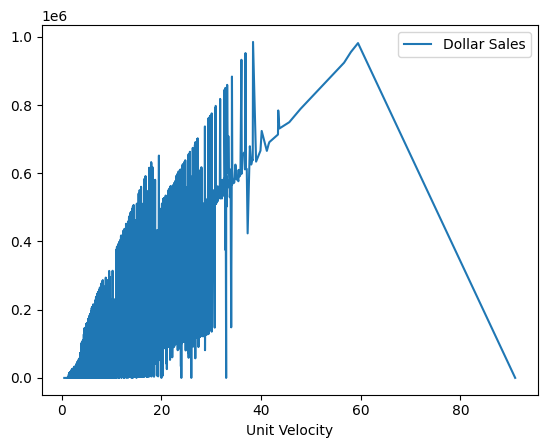

In [ ]:
#Sales by Unit Velocity
sales_unit_velocity = pd.pivot_table(df, values = "Dollar Sales", index= "Unit Velocity")
sales_unit_velocity.plot()

<Axes: xlabel='Distribution Index'>

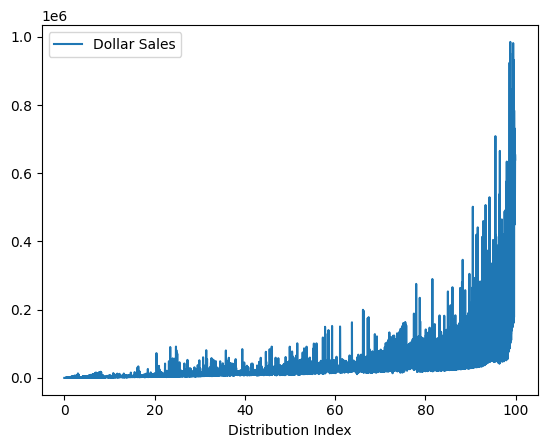

In [ ]:
#Sales by distribution index
sales_dist_idx = pd.pivot_table(df, values = "Dollar Sales", index= "Distribution Index")
sales_dist_idx.plot()

In [ ]:
# Creating column's subsets as per the datatype
dataset_dtypes = df.dtypes.reset_index()
dataset_dtypes.columns = ['variable', 'dtype']
# Getting the categorical columns
cat_cols = dataset_dtypes[dataset_dtypes['dtype']=='object']['variable'].tolist()
# Getting the continuos columns
cont_cols = dataset_dtypes[dataset_dtypes['dtype']!='object']['variable'].tolist()

print("Categorical Columns:", cat_cols)
print()
print("Continuos Columns:", cont_cols)

Categorical Columns: ['Product', 'Month', 'Day', 'Year', 'Week', 'Holiday', 'Season']

Continuos Columns: ['Dollar Sales', 'Unit Sales', 'Avg Prc/Unit', 'Non Promoted-Avg Prc/Unit', 'Promoted Avg Prc/Unit', 'Distribution Index', '% Stores', 'Unit Velocity', 'edate', 'sdate']


In [ ]:
df[cat_cols].describe().T

,count,unique,top,freq
Product,20712,198,414,268
Month,20712,12,1,2100
Day,20712,31,22,713
Year,20712,6,2018,4441
Week,20712,53,4,476
Holiday,20712,2,False,16549
Season,20712,4,Winter,5580


In [ ]:
df[cont_cols].describe(percentiles=[.05,.25,.50,.75,.95]).round(2).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Dollar Sales,20712.0,60736.78,101426.44,0.01,4.00,395.18,24075.49,76374.24,263704.13,984973.79
Unit Sales,20712.0,20525.73,28060.06,1.00,1.00,170.02,10253.50,28429.00,79640.45,271607.00
Avg Prc/Unit,20712.0,2.92,1.61,0.01,0.98,2.00,2.57,3.55,5.05,18.24
Non Promoted-Avg Prc/Unit,20712.0,2.94,1.62,0.01,0.98,2.07,2.58,3.56,5.05,18.24
Promoted Avg Prc/Unit,20712.0,2.73,1.60,0.01,0.89,1.75,2.48,3.27,4.91,18.24
Distribution Index,20712.0,49.35,40.05,0.00,0.03,1.29,53.65,90.03,98.46,99.91
% Stores,20712.0,47.07,39.12,0.02,0.02,1.07,49.69,86.39,97.56,99.85
Unit Velocity,20712.0,6.63,5.75,0.50,1.00,2.97,5.00,8.24,18.35,91.00


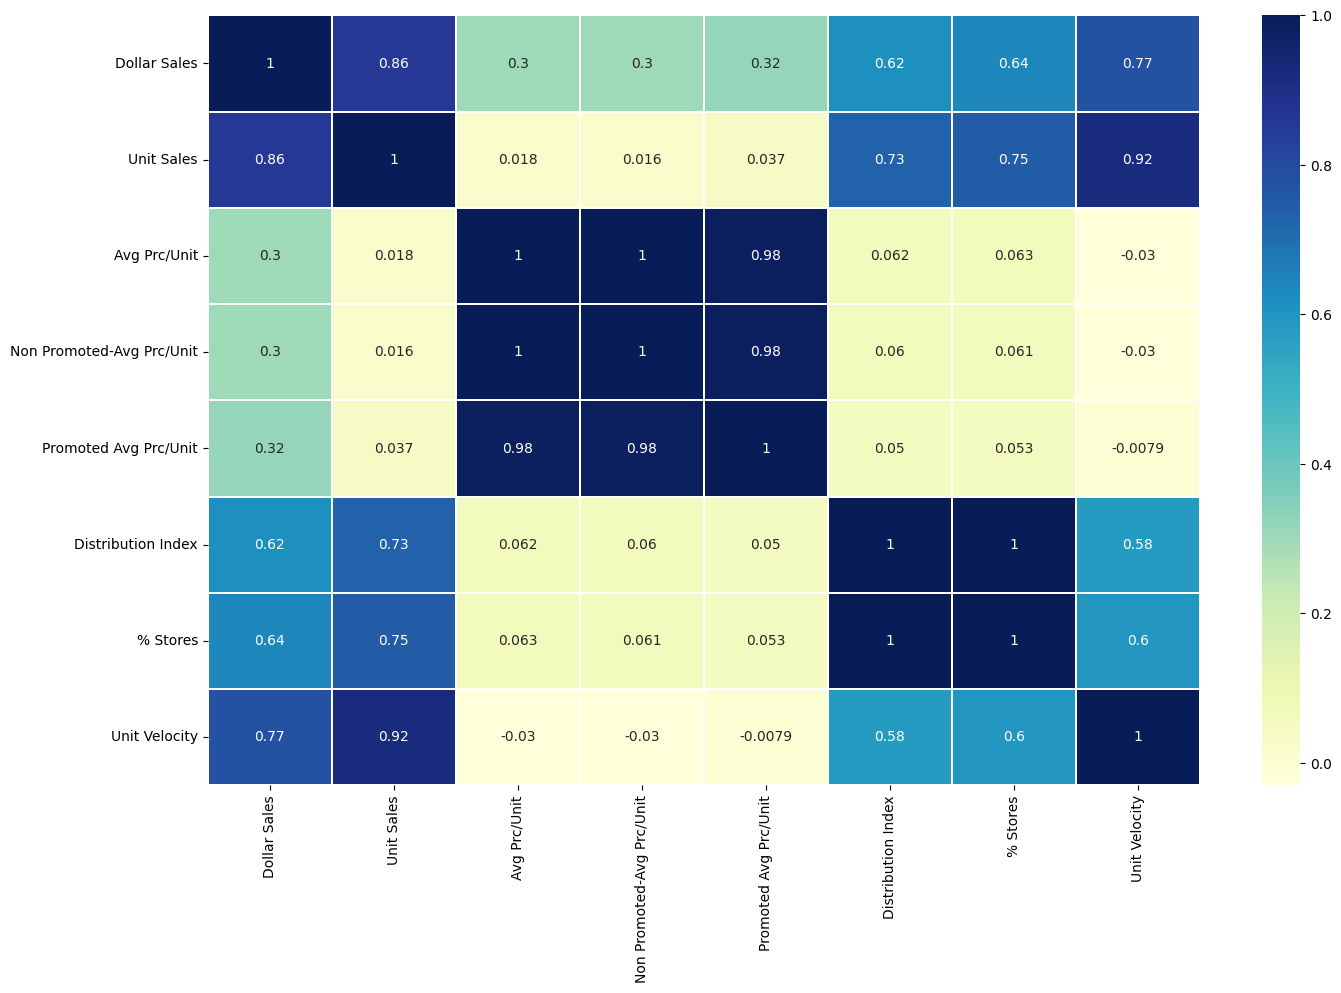

In [ ]:
#Correlation between contious columns
fig = plt.figure(figsize=(16, 10));
sns.heatmap(df[cont_cols].corr(), cmap="YlGnBu",  annot=True, linewidths ='.02');

<Axes: xlabel='Holiday', ylabel='Dollar Sales'>

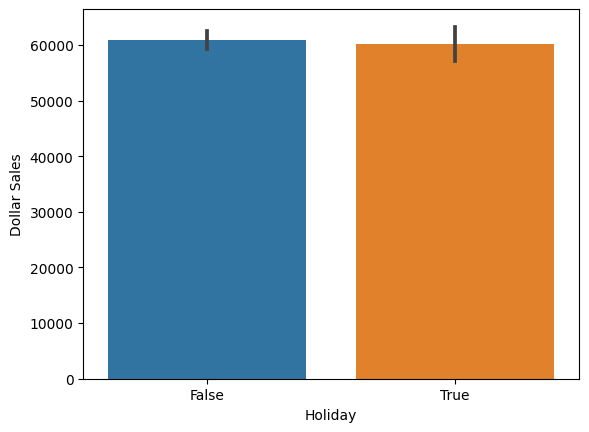

In [ ]:
#Dollar Sales with respect to holidays
sns.barplot(y=df['Dollar Sales'], x=df['Holiday'])

<Axes: xlabel='Season', ylabel='Dollar Sales'>

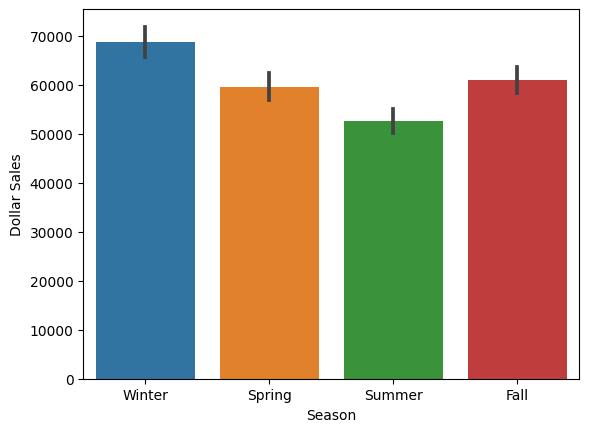

In [ ]:
#Dollar Sales with respect to season
sns.barplot(y=df['Dollar Sales'], x=df['Season'])

<Axes: xlabel='Unit Velocity', ylabel='Dollar Sales'>

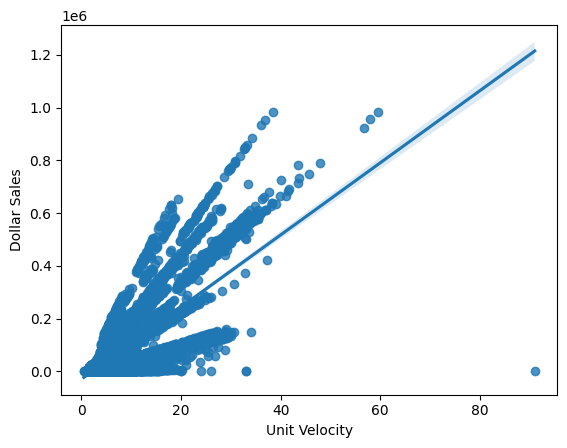

In [ ]:
#Dollar Sales with respect to Unit Velocity
sns.regplot(y=df['Dollar Sales'], x=df['Unit Velocity'], scatter=True)

<Axes: xlabel='% Stores', ylabel='Dollar Sales'>

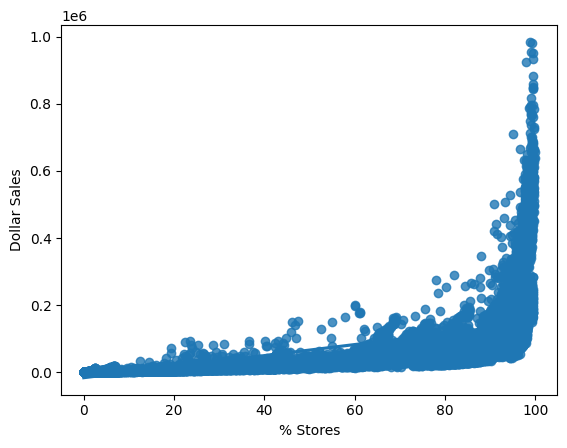

In [ ]:
#Dollar Sales with respect to % Stores
sns.regplot(y=df['Dollar Sales'], x=df['% Stores'], scatter=True)

<Axes: xlabel='Distribution Index', ylabel='Dollar Sales'>

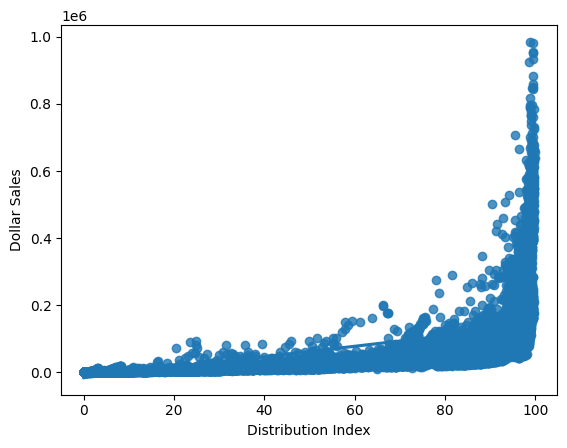

In [ ]:
#Dollar Sales with respect to Distribution index
sns.regplot(y=df['Dollar Sales'], x=df['Distribution Index'], scatter=True)

<Axes: xlabel='Avg Prc/Unit', ylabel='Dollar Sales'>

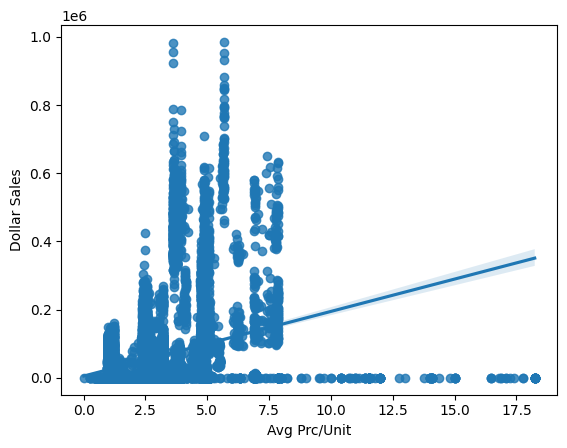

In [ ]:
#Dollar Sales with respect to Avg Prc/Unit
sns.regplot(y=df['Dollar Sales'], x=df['Avg Prc/Unit'], scatter=True)

<Axes: xlabel='Non Promoted-Avg Prc/Unit', ylabel='Dollar Sales'>

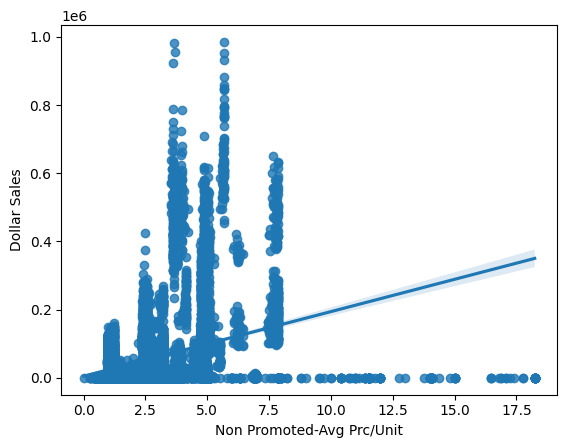

In [ ]:
#Dollar Sales with respect to Non Promoted Avg Prc/Unit
sns.regplot(y=df['Dollar Sales'], x=df['Non Promoted-Avg Prc/Unit'], scatter=True)

<Axes: xlabel='Promoted Avg Prc/Unit', ylabel='Dollar Sales'>

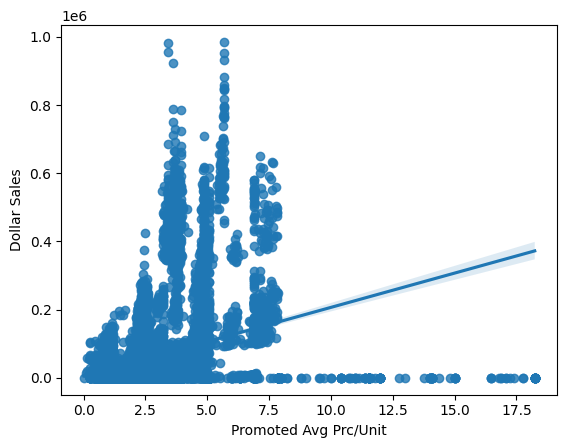

In [ ]:
#Dollar Sales with respect to Promoted Avg Prc/Unit
sns.regplot(y=df['Dollar Sales'], x=df['Promoted Avg Prc/Unit'], scatter=True)

<Axes: >

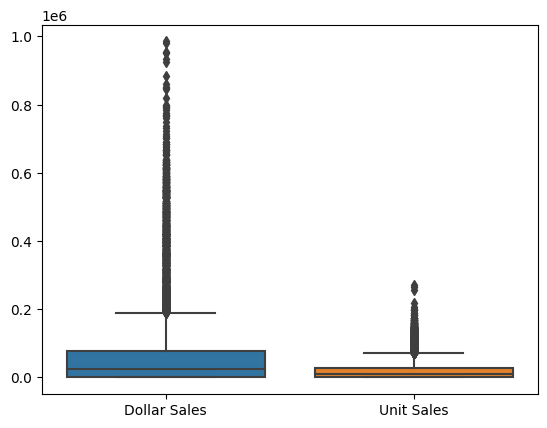

In [ ]:
#Statistical summary of Dollar sales and Unit Sales
sns.boxplot(df[['Dollar Sales','Unit Sales']])

<Axes: >

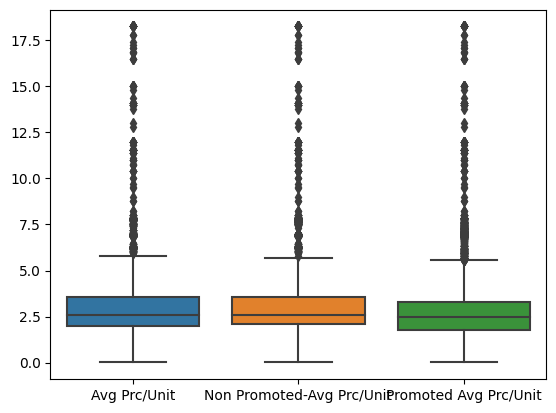

In [ ]:
#Statistical summary of Avg Prc/Unit, Promoted - Avg Prc/Unit and Non Promoted Avg Prc/Unit
sns.boxplot(df[['Avg Prc/Unit','Non Promoted-Avg Prc/Unit','Promoted Avg Prc/Unit']])

<Axes: >

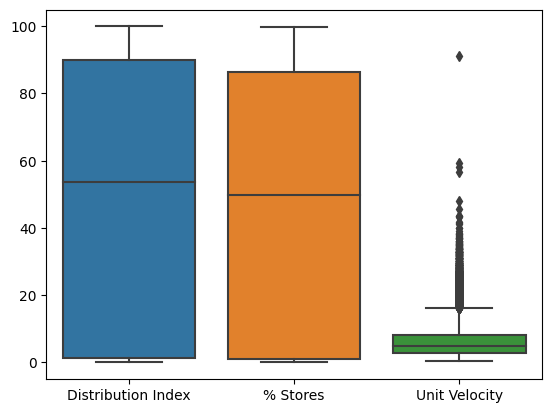

In [ ]:
#Statistical summary of Distribution index, % Stores and Unit Velocity
sns.boxplot(df[['Distribution Index','% Stores','Unit Velocity']])

##Feature Selection Using Random Forest Regressor

In [ ]:
#Create temporary DataFrame with cleaned data
df_tmp=df.drop(columns=['Product','sdate','edate'])

In [ ]:
df_tmp.head()

,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Month,Day,Year,Week,Holiday,Season
489,3.78,2.0,1.890000,1.89,1.89,0.027212,0.021796,2.000000,1,09,2022,52,False,Winter
490,13.23,7.0,1.890000,1.89,1.89,0.087065,0.065388,2.333333,1,16,2022,1,False,Winter
491,4.78,3.0,1.593333,1.89,1.00,0.043179,0.043592,1.500000,1,23,2022,2,True,Winter
492,19.23,13.0,1.479231,1.89,1.00,0.100525,0.087184,3.250000,1,30,2022,3,False,Winter
493,9.67,7.0,1.381429,1.89,1.00,0.072208,0.065388,2.333333,2,06,2022,4,False,Winter


In [ ]:
#Encoding Categorical Data
enc_data = pd.get_dummies(df_tmp, columns=['Holiday','Season'], drop_first=True)
print("Shape of the dataset after encoding:", enc_data.shape)

Shape of the dataset after encoding: (20712, 16)


In [ ]:
#Assign X and y values
X=enc_data.drop(['Dollar Sales'], axis=1)
y=enc_data['Dollar Sales']

In [ ]:
#Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Feature ranking:
1. feature 4 (0.199294)
2. feature 0 (0.197191)
3. feature 5 (0.176996)
4. feature 6 (0.158159)
5. feature 3 (0.104532)
6. feature 1 (0.085568)
7. feature 2 (0.068561)
8. feature 9 (0.003871)
9. feature 10 (0.002027)
10. feature 7 (0.001549)
11. feature 8 (0.000736)
12. feature 14 (0.000626)
13. feature 13 (0.000593)
14. feature 12 (0.000203)
15. feature 11 (0.000093)


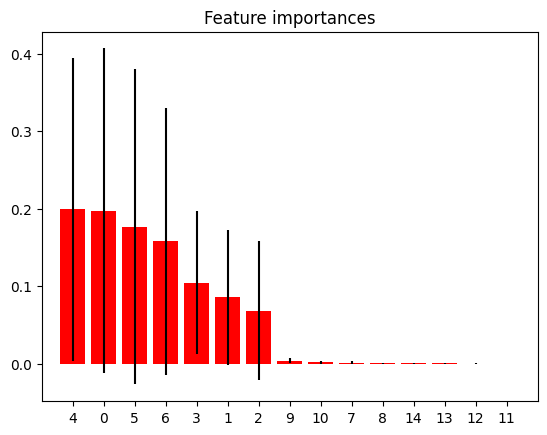

In [ ]:
#defining Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)
#RobustScaler is used for sacaling data
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

##Regression Models

In [ ]:
#Based on feature importance pass only top 7 features
new_enc_data= enc_data[['Dollar Sales','Unit Sales','Avg Prc/Unit','Non Promoted-Avg Prc/Unit','Promoted Avg Prc/Unit','Distribution Index','% Stores','Unit Velocity']]

In [ ]:
#Select target variable and other variables in X and y
X=new_enc_data.drop(['Dollar Sales'], axis=1)
y=new_enc_data['Dollar Sales']

#Split the data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Selecting models
Reg_model = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
mse = []
rmse = []
i = 0
for reg in Reg_model:
    reg.fit(X_train, y_train)
    name.append(type(reg).__name__)
    score.append(reg.score(X_train, y_train))
    models.append(reg)
    mse.append(mean_squared_error(reg.predict(X_test), y_test))
    rmse.append(mean_squared_error(reg.predict(X_test), y_test, squared=False))

In [ ]:
#Printing Performance of Models
df_score = pd.DataFrame(list(zip(name,mse,rmse,score, models)),columns=['name','mse','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,mse,rmse,score,model
name,,,,
SVR,1.187074e+10,108952.928685,-0.095518,SVR()
LinearRegression,1.982403e+09,44524.188164,0.820907,LinearRegression()
AdaBoostRegressor,1.207684e+09,34751.750812,0.887170,"(DecisionTreeRegressor(max_depth=3, random_sta..."
GradientBoostingRegressor,4.454477e+07,6674.186964,0.996589,([DecisionTreeRegressor(criterion='friedman_ms...
LGBMRegressor,3.646507e+07,6038.631395,0.998052,LGBMRegressor()
RandomForestRegressor,9.261807e+06,3043.321639,0.999859,"(DecisionTreeRegressor(max_features=1.0, rando..."
XGBRegressor,1.783245e+07,4222.848232,0.999908,"XGBRegressor(base_score=None, booster=None, ca..."
DecisionTreeRegressor,2.509896e+07,5009.885793,1.000000,DecisionTreeRegressor()


##Time Series Model

In [ ]:
#Input Data
df.head()

,Product,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Month,Day,Year,edate,sdate,Week,Holiday,Season
489,2,3.78,2.0,1.890000,1.89,1.89,0.027212,0.021796,2.000000,1,09,2022,2022-01-09,2022-01-02,52,False,Winter
490,2,13.23,7.0,1.890000,1.89,1.89,0.087065,0.065388,2.333333,1,16,2022,2022-01-16,2022-01-09,1,False,Winter
491,2,4.78,3.0,1.593333,1.89,1.00,0.043179,0.043592,1.500000,1,23,2022,2022-01-23,2022-01-16,2,True,Winter
492,2,19.23,13.0,1.479231,1.89,1.00,0.100525,0.087184,3.250000,1,30,2022,2022-01-30,2022-01-23,3,False,Winter
493,2,9.67,7.0,1.381429,1.89,1.00,0.072208,0.065388,2.333333,2,06,2022,2022-02-06,2022-01-30,4,False,Winter


In [ ]:
#Removing Start of week information
df=df.drop(columns=['sdate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20712 entries, 489 to 122596
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Product                    20712 non-null  object        
 1   Dollar Sales               20712 non-null  float64       
 2   Unit Sales                 20712 non-null  float64       
 3   Avg Prc/Unit               20712 non-null  float64       
 4   Non Promoted-Avg Prc/Unit  20712 non-null  float64       
 5   Promoted Avg Prc/Unit      20712 non-null  float64       
 6   Distribution Index         20712 non-null  float64       
 7   % Stores                   20712 non-null  float64       
 8   Unit Velocity              20712 non-null  float64       
 9   Month                      20712 non-null  object        
 10  Day                        20712 non-null  object        
 11  Year                       20712 non-null  object        
 12  e

In [ ]:
#seting date as index
df.set_index('edate', inplace=True)

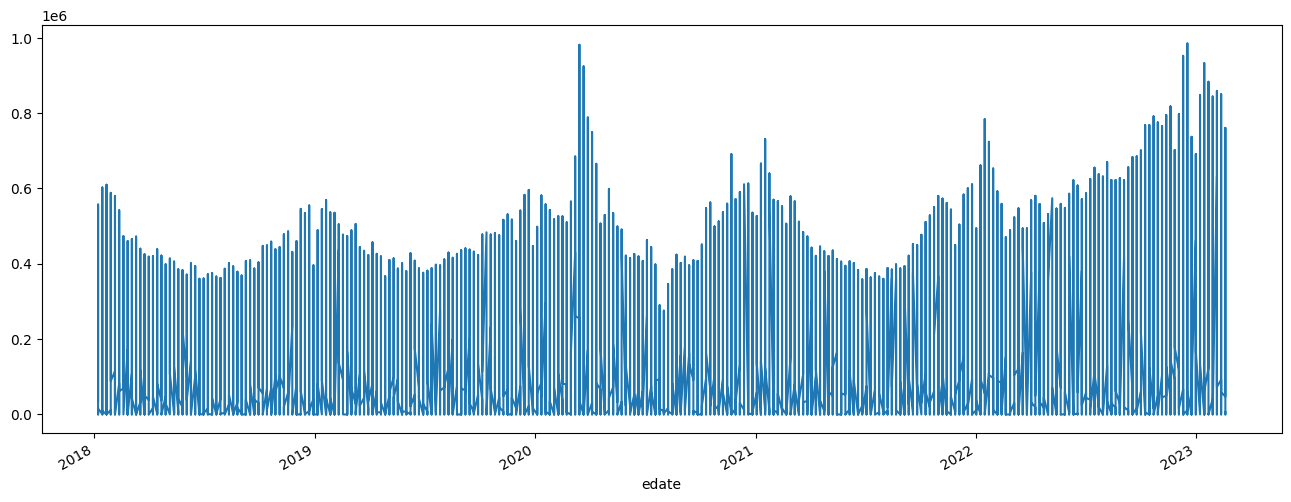

In [ ]:
#Trend of Dollar Sales
plt.figure(figsize=(16,6))
df['Dollar Sales'].plot()
plt.show()

In [ ]:
#resample data as weekly
df_week = df.resample('W').mean()

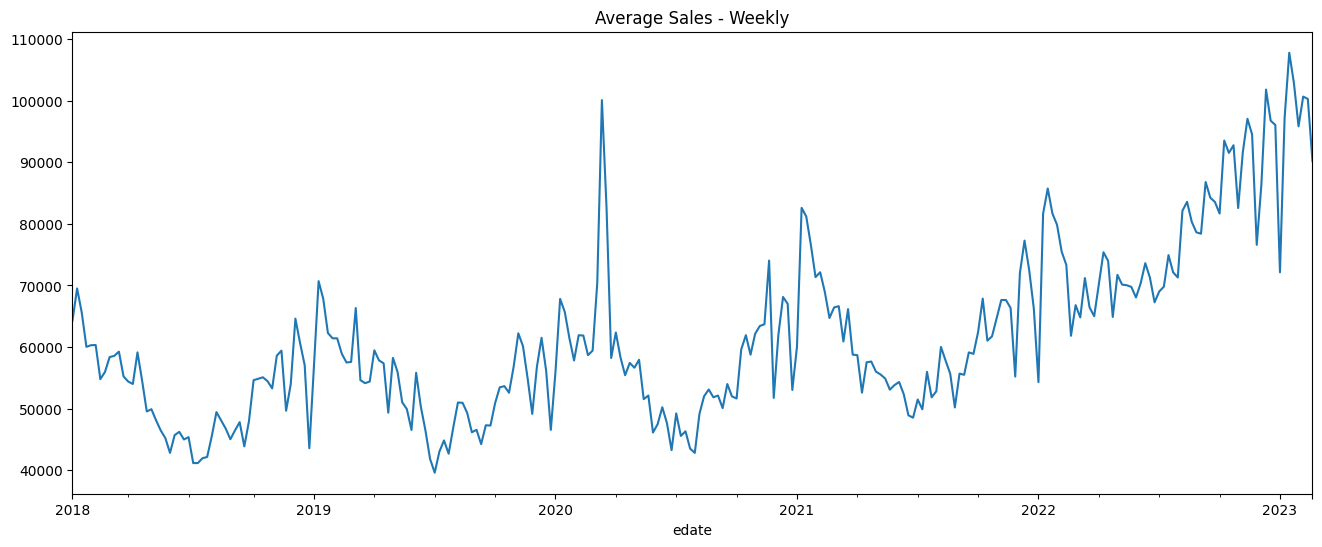

In [ ]:
#Trend of Average weekly Sales
plt.figure(figsize=(16,6))
df_week['Dollar Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [ ]:
df_month = df.resample('MS').mean() # resampling as monthly

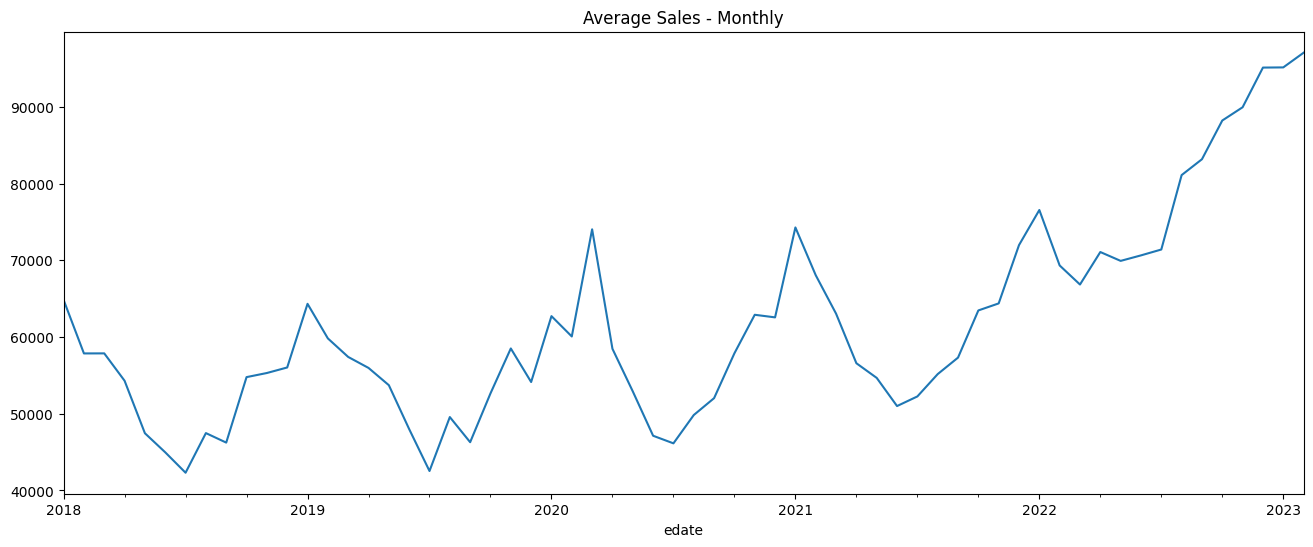

In [ ]:
#Trend of Monthly Average Sales
plt.figure(figsize=(16,6))
df_month['Dollar Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [ ]:
# finding 2-weeks rolling mean and std
rol_mean = df_week['Dollar Sales'].rolling(window=2, center=False).mean()
rol_std = df_week['Dollar Sales'].rolling(window=2, center=False).std()

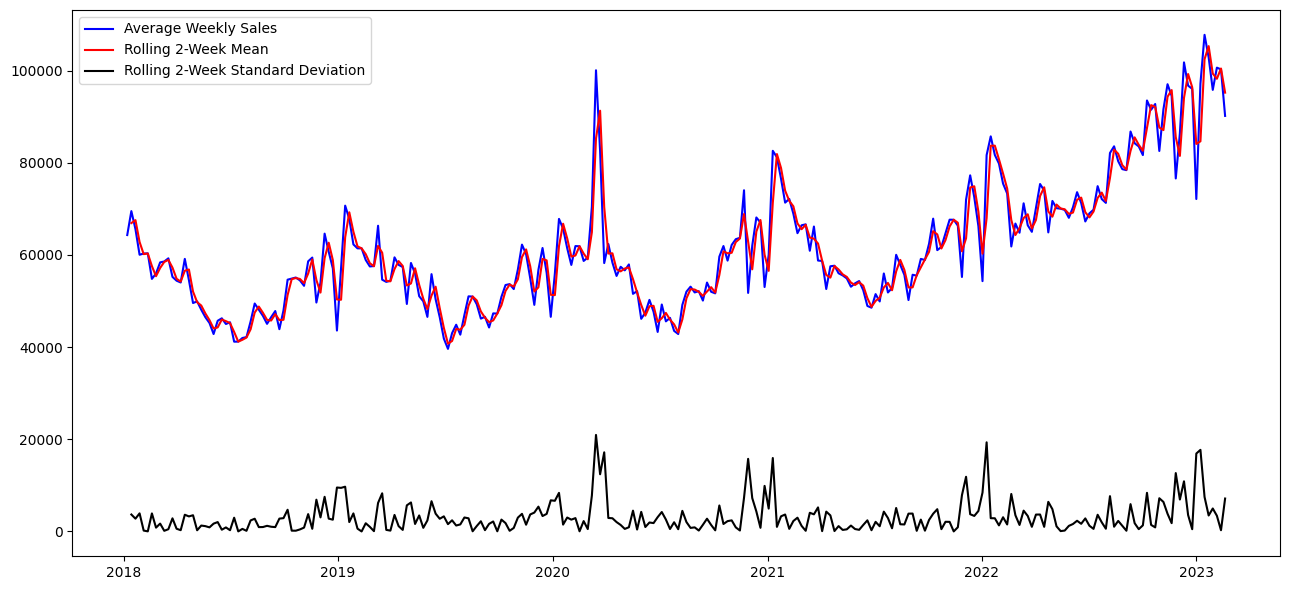

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Dollar Sales'], color='blue',label='Average Weekly Sales')
ax.plot(rol_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(rol_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
#Split data for training and validation
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)


Train: (187, 8)
Test: (81, 8)


In [ ]:
#Asign variables to X and y
target = "Dollar Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except Dollar Sales

# assigning train-test X-y values
X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

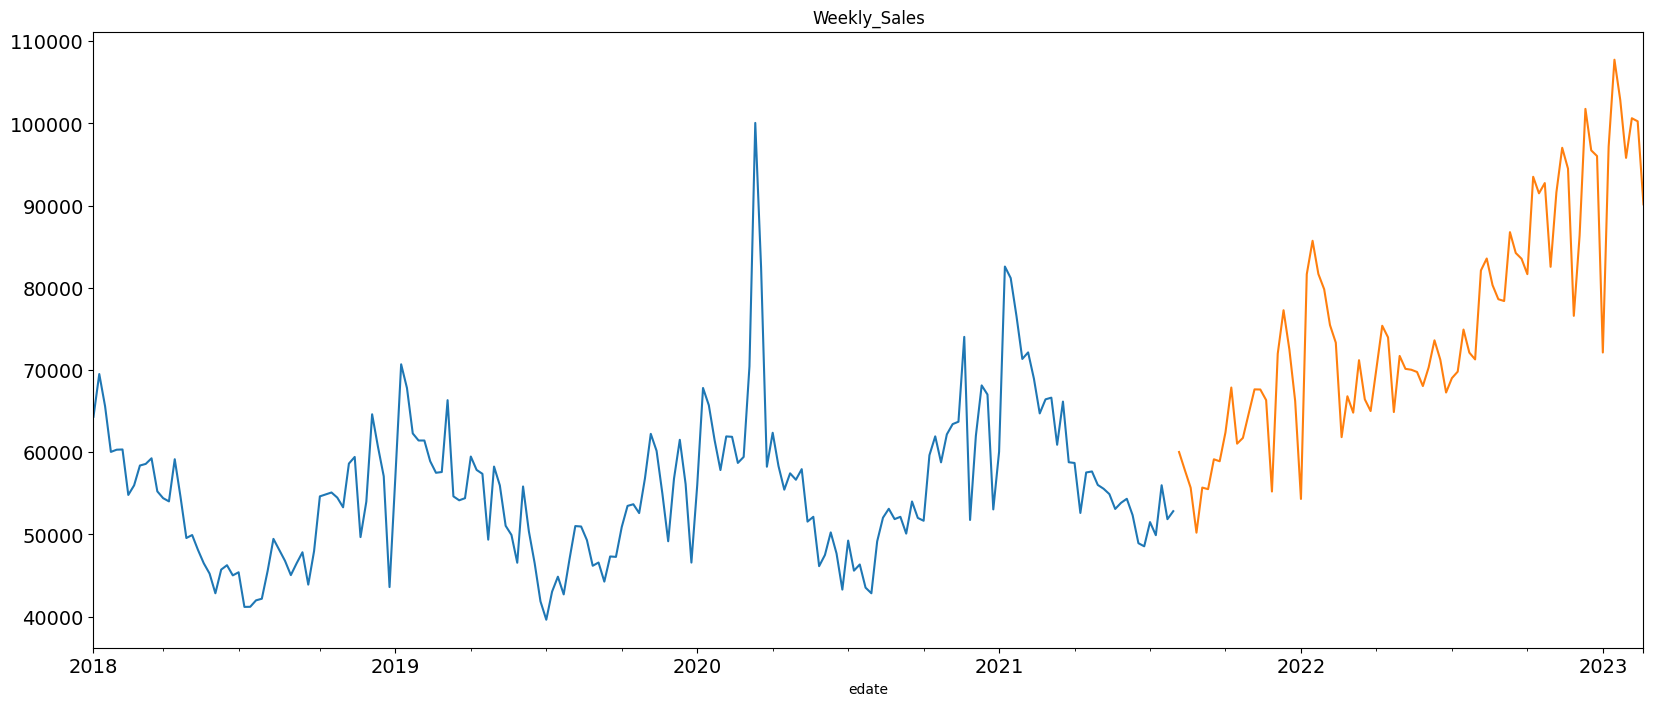

In [ ]:
train_data['Dollar Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Dollar Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [ ]:
#Using Adfuller Test for checking stationary data
adfuller(df_week['Dollar Sales'])

(-1.0025050460457687,
 0.7523495470139271,
 9,
 258,
 {'1%': -3.455952927706342,
  '5%': -2.8728086526320302,
  '10%': -2.572774990685656},
 5070.354406759576)

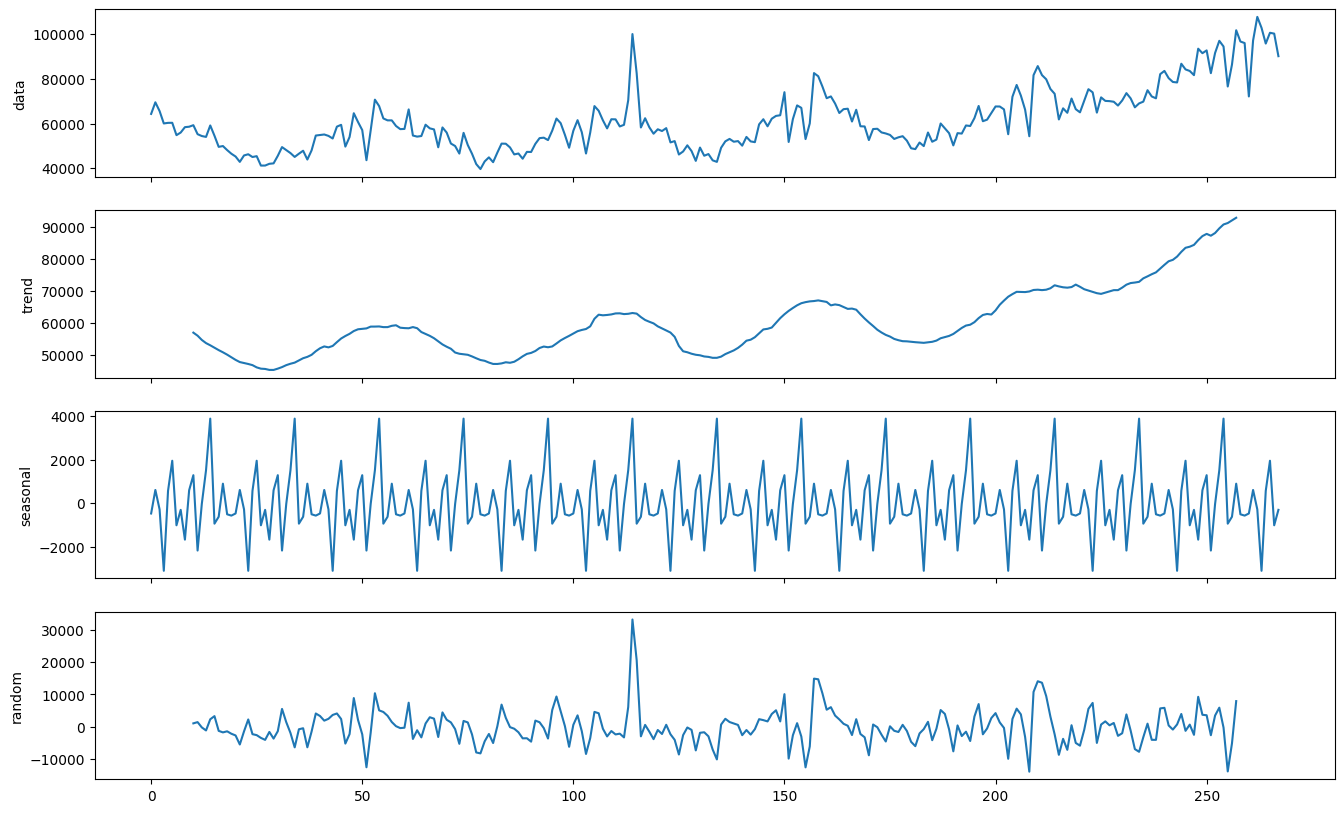

In [ ]:
 #decomposing of weekly data
decomposed = decompose(df_week['Dollar Sales'].values, 'additive', m=20)
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()


In [ ]:
#creating difference values
df_week_diff = df_week['Dollar Sales'].diff().dropna()

In [ ]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

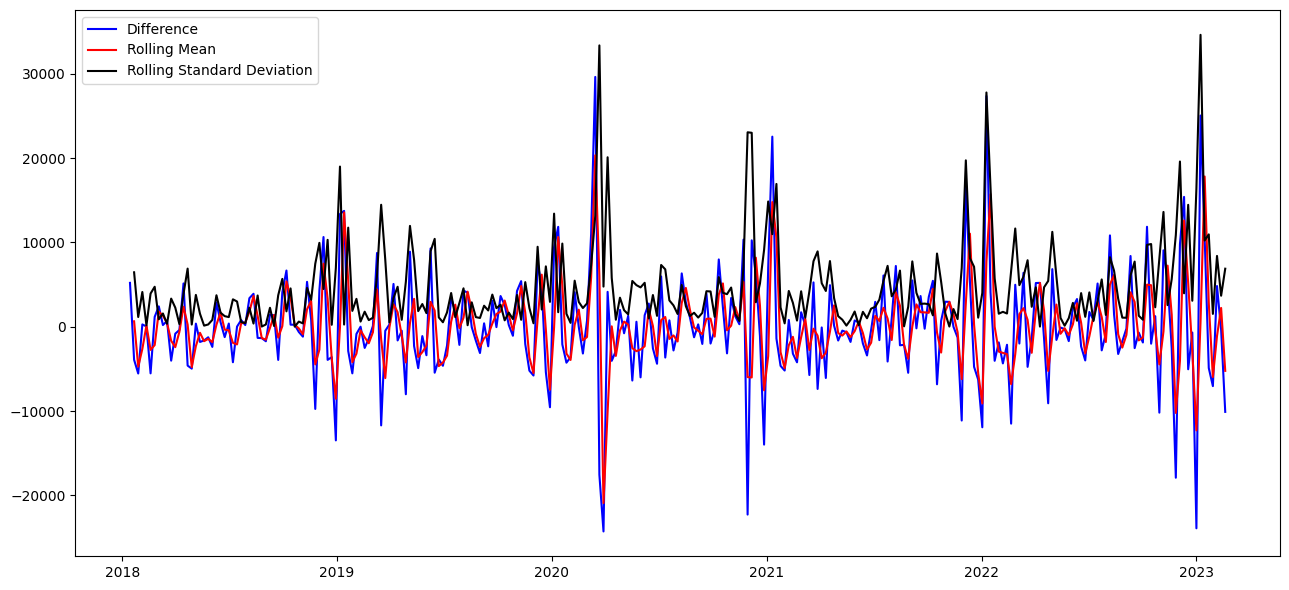

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
 #shifting the data
df_week_lag = df_week['Dollar Sales'].shift().dropna()


In [ ]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean()
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

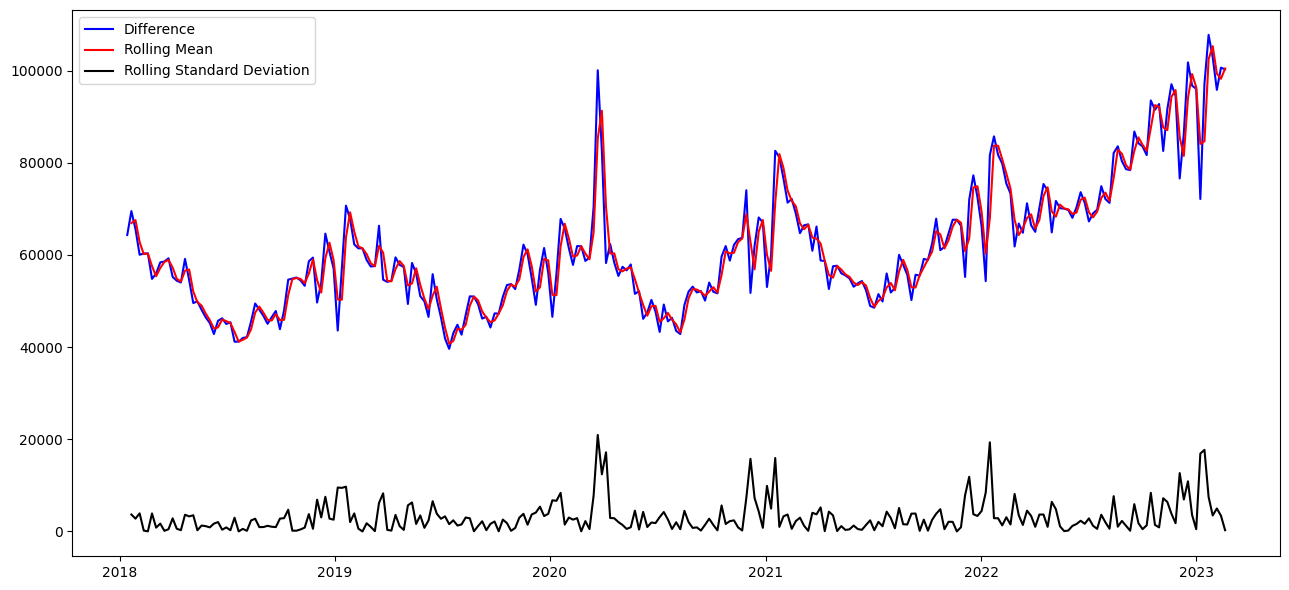

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
#taking log of data
logged_week = np.log1p(df_week['Dollar Sales']).dropna()

In [ ]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

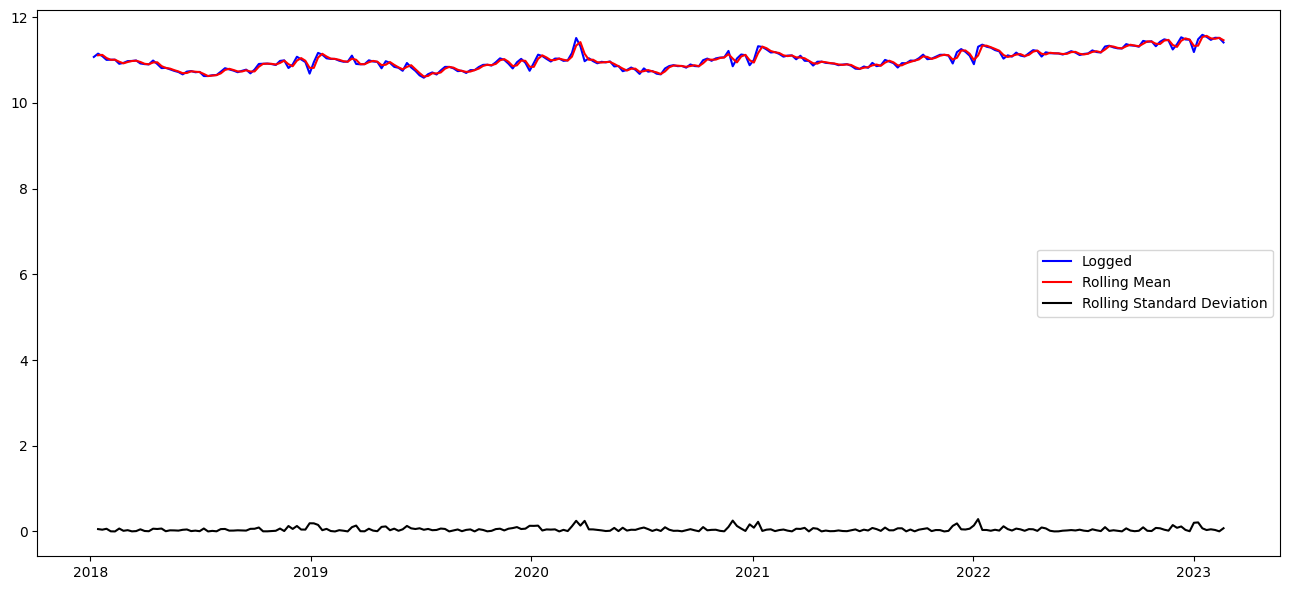

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]


In [ ]:
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=3767.033, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=3763.579, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=3739.193, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=3741.407, Time=0.12 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=3739.910, Time=0.09 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=3740.274, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=3767.958, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=3750.900, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=3741.138, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=3741.152, Time=0.44 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=3740.156, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=3741.219, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=3735.469, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=3737.222, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=3735.652, Time=0.32 sec
 ARIMA(3,0

ARIMA(maxiter=200, order=(3, 0, 0), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

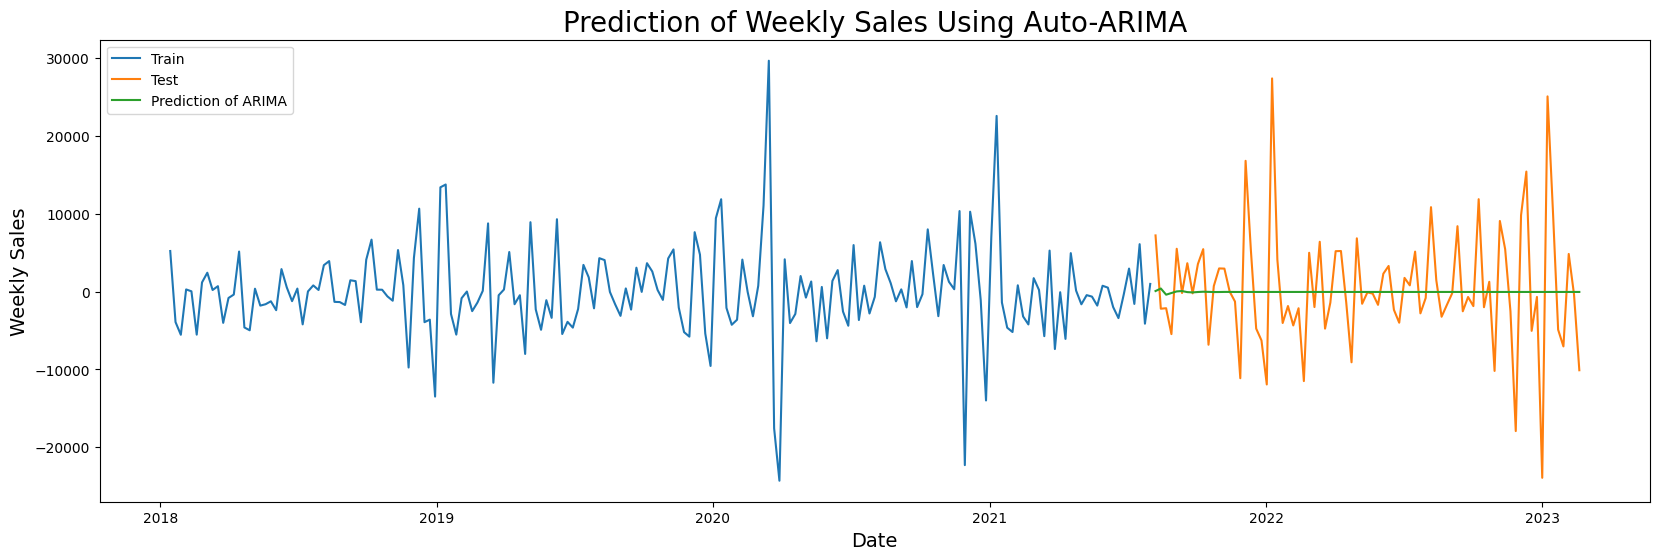

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

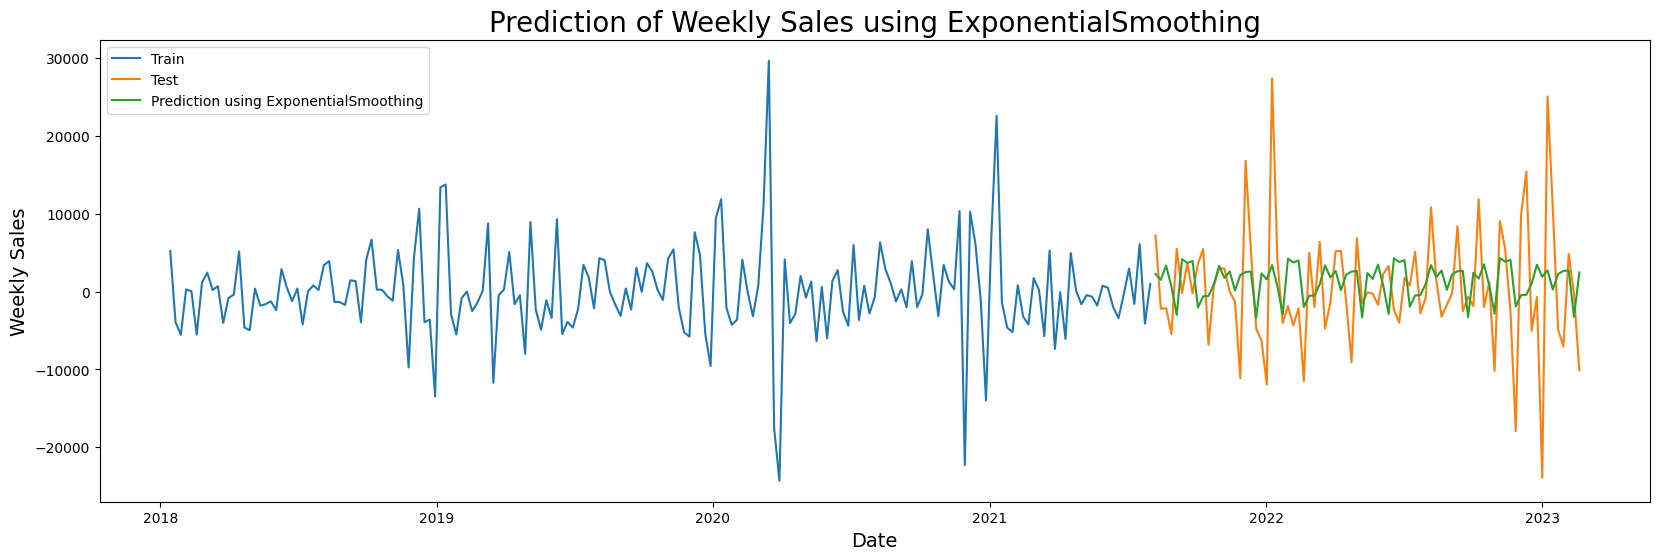

In [ ]:
model_exp_smo = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_exp_smo.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
#Evaluating model using MSE
mean_squared_error(test_data_diff, y_pred)

62442376.06387964

In [ ]:
#Evaluating model using RMSE
mean_squared_error(test_data_diff, y_pred, squared=False)

7902.048852283795

##Pipeline Model with estimated Parameters

In [ ]:
#Making Pipeline
lin_reg= make_pipeline(BinaryEncoder(cols=['Holiday','Season']),StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())

In [ ]:
#Define GridSearchCV
grid_search = GridSearchCV(estimator= lin_reg,param_grid={'polynomialfeatures__degree':[2,3]},cv=5,scoring='r2')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20712 entries, 2022-01-09 to 2020-03-01
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product                    20712 non-null  object 
 1   Dollar Sales               20712 non-null  float64
 2   Unit Sales                 20712 non-null  float64
 3   Avg Prc/Unit               20712 non-null  float64
 4   Non Promoted-Avg Prc/Unit  20712 non-null  float64
 5   Promoted Avg Prc/Unit      20712 non-null  float64
 6   Distribution Index         20712 non-null  float64
 7   % Stores                   20712 non-null  float64
 8   Unit Velocity              20712 non-null  float64
 9   Month                      20712 non-null  object 
 10  Day                        20712 non-null  object 
 11  Year                       20712 non-null  object 
 12  Week                       20712 non-null  object 
 13  Holiday                    20

In [ ]:
#Remove Product information
df=df.drop(columns=['Product'])

In [ ]:
#Assign X and y values
X=df.drop(['Dollar Sales'], axis=1)
y=df['Dollar Sales']

In [ ]:
#Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model fitting
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('binaryencoder',
                                        BinaryEncoder(cols=['Holiday',
                                                            'Season'])),
                                       ('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [2, 3]}, scoring='r2')

In [ ]:
#Estimation of best score
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best parameters are: ",best_params)
print('Mean cross-validated score of the best_estimator is: ',best_score)

Best parameters are:  {'polynomialfeatures__degree': 2}
Mean cross-validated score of the best_estimator is:  1.0


In [ ]:
#fit estimated parameters within Model Pipeline
lin_reg.fit(X_train,y_train)

Pipeline(steps=[('binaryencoder',
                 BinaryEncoder(cols=['Holiday', 'Season'],
                               mapping=[{'col': 'Holiday',
                                         'mapping':     Holiday_0  Holiday_1
 1          0          1
 2          1          0
-1          0          0
-2          0          0},
                                        {'col': 'Season',
                                         'mapping':     Season_0  Season_1  Season_2
 1         0         0         1
 2         0         1         0
 3         0         1         1
 4         1         0         0
-1         0         0         0
-2         0         0         0}])),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
#Model Score
lin_reg.score(X_train,y_train)

1.0

In [ ]:
#Predicting for new values
y_pred = lin_reg.predict(X_test)

In [ ]:
#Mean Squared error for model
mean_squared_error(y_test, y_pred)

1.3015777870132905e-19

In [ ]:
#Root Mean Squared error for model
mean_squared_error(y_test, y_pred, squared=False)

3.6077386088979484e-10

In [ ]:
df.head()

,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Month,Day,Year,Week,Holiday,Season
edate,,,,,,,,,,,,,,
2022-01-09,3.78,2.0,1.890000,1.89,1.89,0.027212,0.021796,2.000000,1,09,2022,52,False,Winter
2022-01-16,13.23,7.0,1.890000,1.89,1.89,0.087065,0.065388,2.333333,1,16,2022,1,False,Winter
2022-01-23,4.78,3.0,1.593333,1.89,1.00,0.043179,0.043592,1.500000,1,23,2022,2,True,Winter
2022-01-30,19.23,13.0,1.479231,1.89,1.00,0.100525,0.087184,3.250000,1,30,2022,3,False,Winter
2022-02-06,9.67,7.0,1.381429,1.89,1.00,0.072208,0.065388,2.333333,2,06,2022,4,False,Winter


##Predicting 52 weeks Dollar Sales for Banana Flavoured Oatmeal

In [ ]:
#Loading dataset for prediction
os.chdir('/content/drive/MyDrive/Pepsico')

df_new=pd.read_excel('/content/drive/MyDrive/Pepsico/casestudy_input.xlsx')

In [ ]:
#Copy data for results
df_new_cp=df_new

In [ ]:
#Deleting Coulumns that do not add information
df_new=df_new.drop(columns=['Category', 'Sub Category', 'UPC'])


In [ ]:
#Formatting Time column to find Month, Day and Year
df_new['Time']=df_new['Time'].apply(lambda x: x.strip())
df_new['Time']=df_new['Time'].apply(lambda x: x.split(" "))

df_new['Month']=df_new['Time'].apply(lambda x: x.pop(3))
df_new['Day']=df_new['Time'].apply(lambda x: x.pop(3))
df_new['Year']=df_new['Time'].apply(lambda x: x.pop(3))

print(df_new[['Month','Day','Year']])

#Removing Comma in Day information
df_new['Day']=df_new['Day'].str.replace(',','')
print(df_new[['Month','Day','Year']])

#Replacing Month names with Month number
df_new['Month']=df_new['Month'].str.replace('Jan','1')
df_new['Month']=df_new['Month'].str.replace('Feb','2')
df_new['Month']=df_new['Month'].str.replace('Mar','3')
df_new['Month']=df_new['Month'].str.replace('Apr','4')
df_new['Month']=df_new['Month'].str.replace('May','5')
df_new['Month']=df_new['Month'].str.replace('Jun','6')
df_new['Month']=df_new['Month'].str.replace('Jul','7')
df_new['Month']=df_new['Month'].str.replace('Aug','8')
df_new['Month']=df_new['Month'].str.replace('Sep','9')
df_new['Month']=df_new['Month'].str.replace('Oct','10')
df_new['Month']=df_new['Month'].str.replace('Nov','11')
df_new['Month']=df_new['Month'].str.replace('Dec','12')


   Month  Day  Year
0    Jan  03,  2024
1    Jan  10,  2024
2    Jan  17,  2024
3    Jan  24,  2024
4    Jan  31,  2024
5    Feb  07,  2024
6    Feb  14,  2024
7    Feb  21,  2024
8    Feb  28,  2024
9    Mar  07,  2024
10   Mar  14,  2024
11   Mar  21,  2024
12   Mar  28,  2024
13   Apr  04,  2024
14   Apr  11,  2024
15   Apr  18,  2024
16   Apr  25,  2024
17   May  02,  2024
18   May  09,  2024
19   May  16,  2024
20   May  23,  2024
21   May  30,  2024
22   Jun  06,  2024
23   Jun  13,  2024
24   Jun  20,  2024
25   Jun  27,  2024
26   Jul  04,  2024
27   Jul  11,  2024
28   Jul  18,  2024
29   Jul  25,  2024
30   Aug  01,  2024
31   Aug  08,  2024
32   Aug  15,  2024
33   Aug  22,  2024
34   Aug  29,  2024
35   Sep  05,  2024
36   Sep  12,  2024
37   Sep  19,  2024
38   Sep  26,  2024
39   Oct  03,  2024
40   Oct  10,  2024
41   Oct  17,  2024
42   Oct  24,  2024
43   Oct  31,  2024
44   Nov  07,  2024
45   Nov  14,  2024
46   Nov  21,  2024
47   Nov  28,  2024
48   Dec  05,  2024


In [ ]:
df_new.head()

,Product,Time,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Month,Day,Year
0,Product#500,"[1, Week, Ending]",NaN,144561.0,3.49,3.49,3.49,98,98,28,1,03,2024
1,Product#500,"[1, Week, Ending]",NaN,182665.0,3.49,3.49,3.49,98,98,28,1,10,2024
2,Product#500,"[1, Week, Ending]",NaN,200029.0,3.49,3.49,3.49,98,98,28,1,17,2024
3,Product#500,"[1, Week, Ending]",NaN,175386.0,3.49,3.49,3.49,98,98,28,1,24,2024
4,Product#500,"[1, Week, Ending]",NaN,137530.0,3.49,3.49,3.49,98,98,28,1,31,2024


In [ ]:
#Adding date column based on above extracted Month, Year and Day
df_new['edate'] = pd.to_datetime(dict(year=df_new.Year, month=df_new.Month, day=df_new.Day))

#Adding date column 7 days prior to added date column
df_new['sdate'] = df_new['edate'] - pd.Timedelta(days=7)

#Adding Week number based on start of week
df_new['Week']=df_new['sdate'].dt.isocalendar().week

#Adding US Fedral Holidays as True or False
holidays = calendar().holidays(start = df_new['sdate'].min(), end = df_new['edate'].max())
l=[any(x<=z and y>=z for z in holidays.tolist()) for x , y in zip(df_new['sdate'],df_new['edate'])]
[False, True, False, False]
df_new['Holiday']=l

#converting Holiday to Object datatype
df_new['Holiday']=df_new['Holiday'].astype('object')

In [ ]:
#Adding Season information
df_new['Season']=df_new['Month'].apply(lambda x: get_season(int(x)))

df_new['Season'].nunique()

df_new.head()

,Product,Time,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Month,Day,Year,edate,sdate,Week,Holiday,Season
0,Product#500,"[1, Week, Ending]",NaN,144561.0,3.49,3.49,3.49,98,98,28,1,03,2024,2024-01-03,2023-12-27,52,True,Winter
1,Product#500,"[1, Week, Ending]",NaN,182665.0,3.49,3.49,3.49,98,98,28,1,10,2024,2024-01-10,2024-01-03,1,False,Winter
2,Product#500,"[1, Week, Ending]",NaN,200029.0,3.49,3.49,3.49,98,98,28,1,17,2024,2024-01-17,2024-01-10,2,True,Winter
3,Product#500,"[1, Week, Ending]",NaN,175386.0,3.49,3.49,3.49,98,98,28,1,24,2024,2024-01-24,2024-01-17,3,False,Winter
4,Product#500,"[1, Week, Ending]",NaN,137530.0,3.49,3.49,3.49,98,98,28,1,31,2024,2024-01-31,2024-01-24,4,False,Winter


In [ ]:
#Remove date cloumns that are not required for training
df_new=df_new.drop(columns=['Product','Time','edate','sdate'])

In [ ]:
#Assign X and y values
X=df_new.drop(['Dollar Sales'], axis=1)
y=df_new['Dollar Sales']

In [ ]:
#Predict 52 week sales for Banana Flavoured Oatmeal
y_pred = lin_reg.predict(X)

In [ ]:
print(y_pred)

[504517.89       637500.85       698101.21       612097.14
 479979.7        517284.31       511777.1249     436040.6
 554385.19810219 542945.48360586 492475.34161001 465810.3
 455176.27       425636.9449     405736.9649     428072.93
 415816.05       404086.16       417739.04       397050.32
 391386.05       379666.63       390715.97       386726.9
 368393.93       344225.68       369608.45       349209.4
 360042.36       351910.66       346836.2349     375265.7749
 369304.82       383592.88       374271.09       381345.32
 388164.78       402651.77       399325.8        422241.14
 452967.1        468270.75       487821.73       513755.92
 508042.79       497443.66       481511.94670755 398430.08239005
 446351.48355095 517720.56       531425.79       540705.7       ]


In [ ]:
#Add predicted Dollar Sales to Banana Oatmeal dataset
df_new_cp['Dollar Sales']=y_pred

In [ ]:
df_new_cp.head()

,Product,Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
0,Product#500,"1 Week Ending Jan 03, 2024",60000000000,GRITS-HOT CEREAL,HOT CEREAL,504517.89,144561.0,3.49,3.49,3.49,98,98,28
1,Product#500,"1 Week Ending Jan 10, 2024",60000000000,GRITS-HOT CEREAL,HOT CEREAL,637500.85,182665.0,3.49,3.49,3.49,98,98,28
2,Product#500,"1 Week Ending Jan 17, 2024",60000000000,GRITS-HOT CEREAL,HOT CEREAL,698101.21,200029.0,3.49,3.49,3.49,98,98,28
3,Product#500,"1 Week Ending Jan 24, 2024",60000000000,GRITS-HOT CEREAL,HOT CEREAL,612097.14,175386.0,3.49,3.49,3.49,98,98,28
4,Product#500,"1 Week Ending Jan 31, 2024",60000000000,GRITS-HOT CEREAL,HOT CEREAL,479979.70,137530.0,3.49,3.49,3.49,98,98,28


In [ ]:
#Extract output in Excel format
df_new_cp.to_excel("Output.xlsx")